In [1]:
import pandas as pd
from nilearn import plotting
from nilearn.glm.second_level import non_parametric_inference
from decouple import config
from nilearn import plotting
import numpy as np

In [2]:
path = config('happy')
files = pd.read_csv(f"{path}/1stlevel_location.csv")

In [3]:
files['group'] = files['t1'].apply(lambda participant: 0 if 'sub-G1' in participant else 1 )
files['sub'] = files.index

In [4]:
long_form = pd.melt(files, id_vars=['sub'], var_name='time_point', value_vars=['t1', 't2',], value_name='scans').sort_values(by=['sub'], ascending=True).reset_index(drop=True)
long_form['group'] = long_form['scans'].apply(lambda participants: -1 if 'sub-G1' in participants or 'sub-B1' in participants else 1 )
long_form['time'] = long_form['time_point'].apply(lambda participants: -1 if 't1' in participants else 1 )
long_form['intercept'] = 1
long_form = long_form.drop(long_form[long_form['sub'] == 75].index)

In [5]:
dummies_subjects = pd.get_dummies(long_form['sub']).add_prefix('sub-')
interaction_effect = long_form['time'] * long_form['group']

In [6]:
design_matrix = pd.concat([long_form[['intercept', 'group', 'time']], interaction_effect.rename('interaction'), dummies_subjects], axis=1)

<AxesSubplot: label='conditions', ylabel='scan number'>

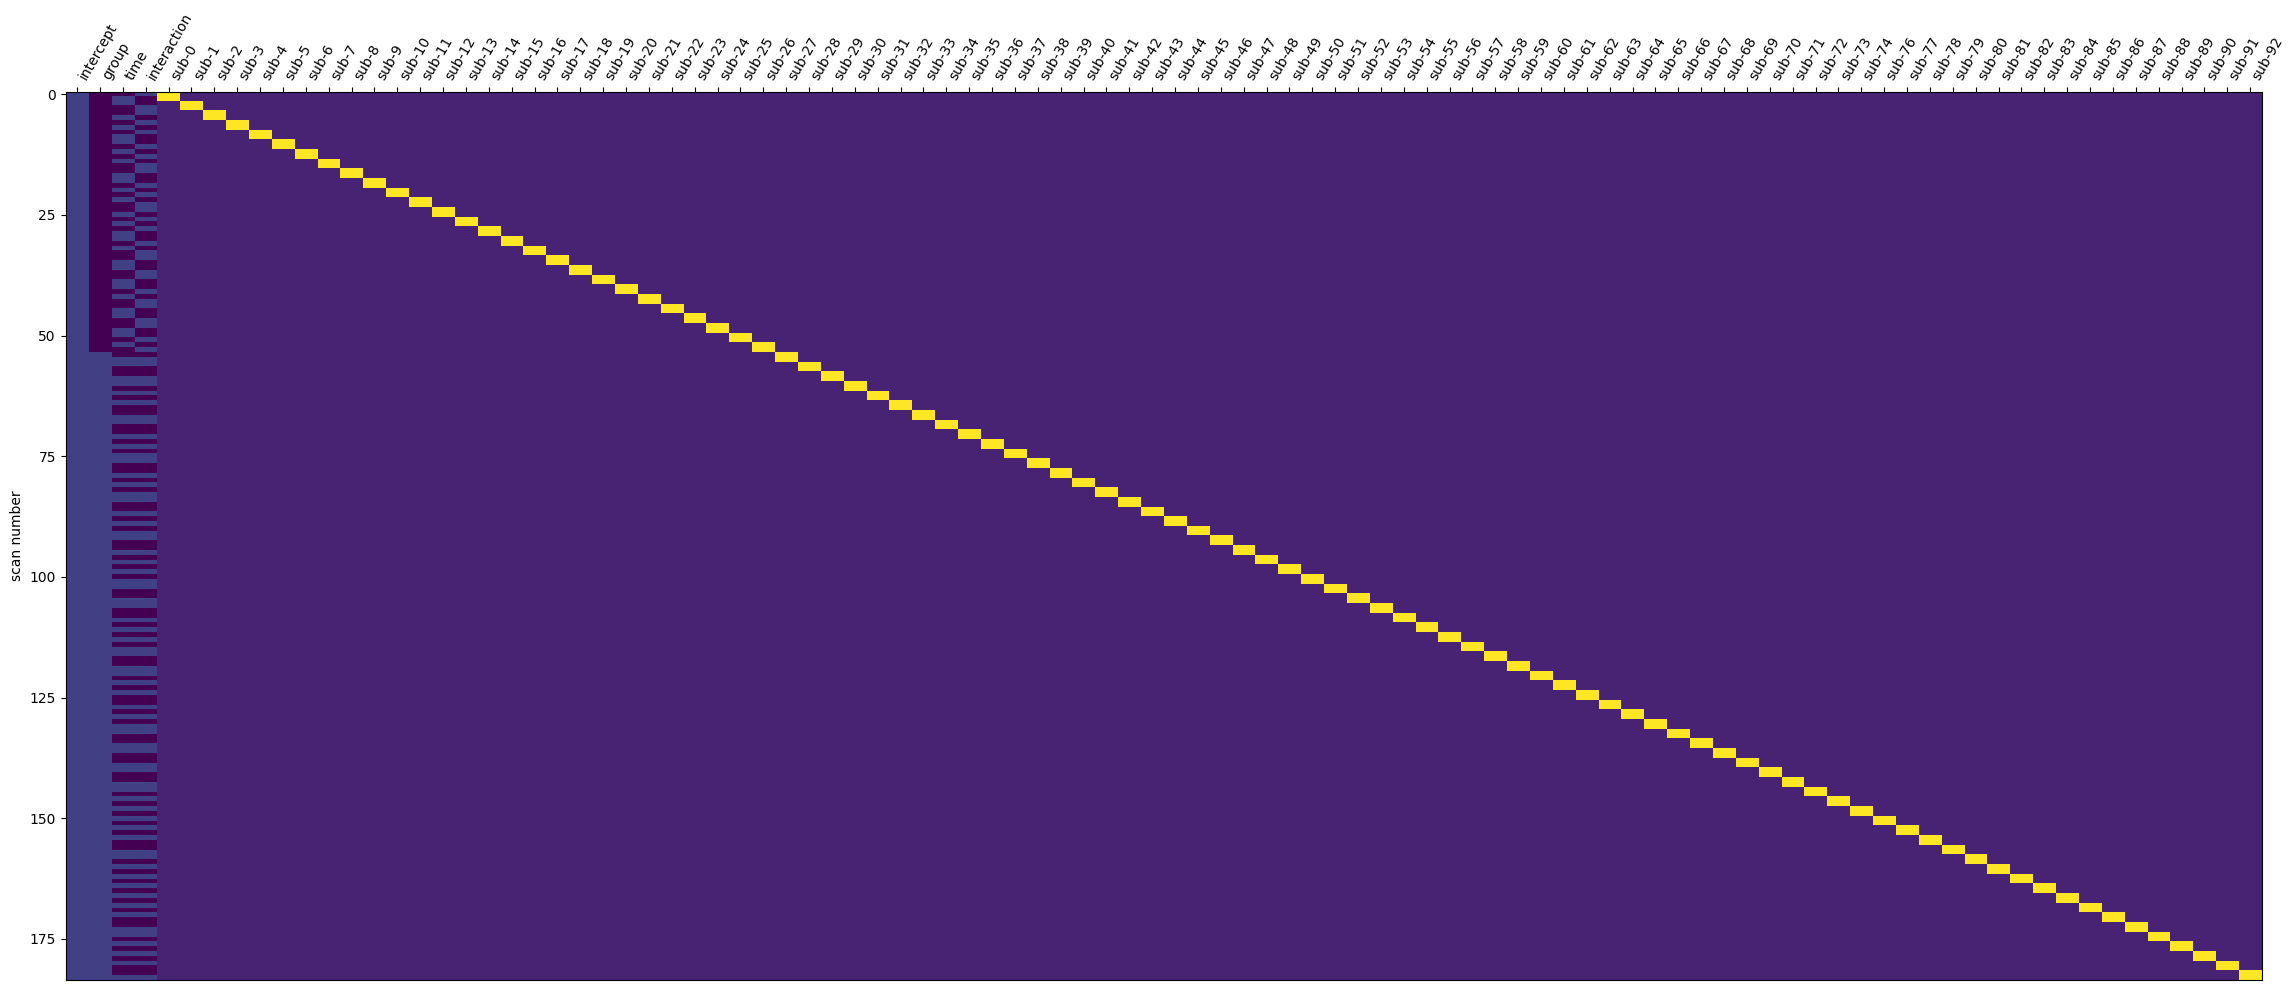

In [7]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)

In [8]:
scans = long_form['scans'].to_list()

In [9]:
results = non_parametric_inference(long_form['scans'].to_list(), 
                         design_matrix=design_matrix,
                         second_level_contrast='time',
                         model_intercept=True,
                         n_perm=500,
                         two_sided_test=True,
                         mask=None,
                         n_jobs=1

)

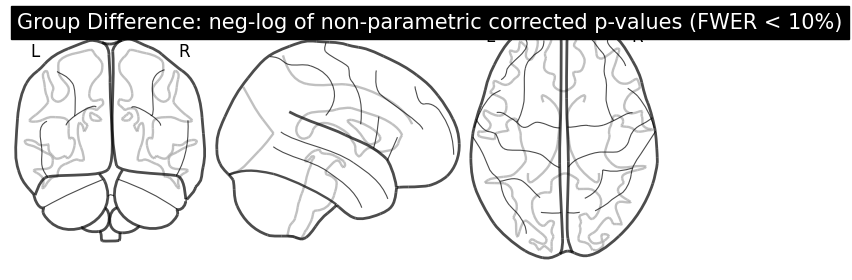

In [11]:
title = ('Group Difference: neg-log of non-parametric corrected p-values (FWER < 10%)')
plotting.plot_glass_brain(results, colorbar=True,
                       cut_coords=[38, -17, -3], threshold=1,
                       title=title)
plotting.show()